In [38]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from prettytable import PrettyTable

In [39]:
# Load data
file_path = os.path.join(os.getcwd(), "rentalApartments_data.csv")

# Check if the file exists
if not os.path.exists(file_path):
    raise FileNotFoundError(f"File not found in the current working directory!")

In [40]:
try:
    data = pd.read_csv(file_path, sep=';', encoding='ISO-8859-1')
except UnicodeDecodeError:
    data = pd.read_csv(file_path, sep=';', encoding='unicode_escape')

C:\conda_temp\ipykernel_25916\1031413669.py:2: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path, sep=';', encoding='ISO-8859-1')


In [41]:
# 1. Display data overview
print(data.head())
print(data.info())

           id                category                            title  \
0  5668640009  housing/rent/apartment       One BR 507 & 509 Esplanade   
1  5668639818  housing/rent/apartment      Three BR 146 Lochview Drive   
2  5668639686  housing/rent/apartment  Three BR 3101 Morningside Drive   
3  5668639659  housing/rent/apartment            Two BR 209 Aegean Way   
4  5668639374  housing/rent/apartment         One BR 4805 Marquette NE   

                                                body amenities  bathrooms  \
0  This unit is located at 507 & 509 Esplanade, R...       NaN        1.0   
1  This unit is located at 146 Lochview Drive, Ne...       NaN        1.5   
2  This unit is located at 3101 Morningside Drive...       NaN        2.0   
3  This unit is located at 209 Aegean Way, Vacavi...       NaN        1.0   
4  This unit is located at 4805 Marquette NE, Alb...       NaN        1.0   

   bedrooms currency fee  has_photo  ... price_display  price_type  \
0       1.0      USD  

C:\conda_temp\ipykernel_25916\2160609625.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_data.index, y=missing_data.values, palette=palette)


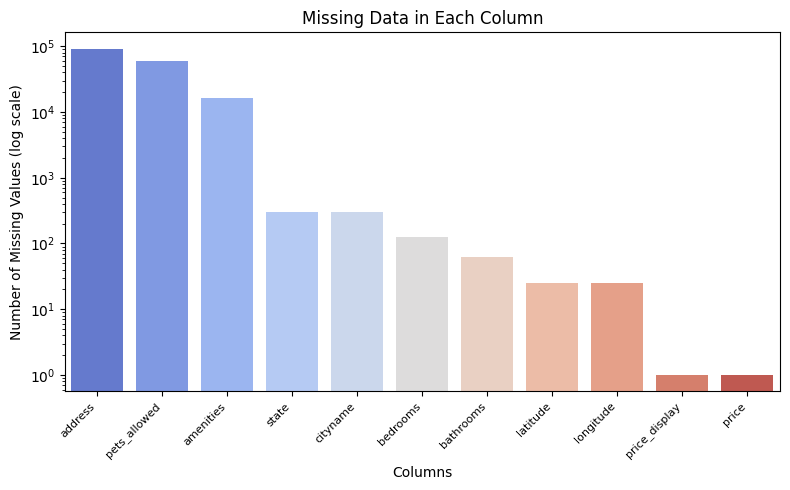

In [42]:
# 2. Check and visualize missing values
missing_data = data.isnull().sum()
missing_data = missing_data[missing_data > 0].sort_values(ascending=False)

# Choose a color palette
palette = sns.color_palette("coolwarm", len(missing_data))

# Plot missing values with smaller size and clear x-axis labels
plt.figure(figsize=(8, 5))  # Reduced figure size
sns.barplot(x=missing_data.index, y=missing_data.values, palette=palette)
plt.xlabel('Columns', fontsize=10)
plt.ylabel('Number of Missing Values (log scale)', fontsize=10)
plt.title('Missing Data in Each Column', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=8)  # Rotate x-axis labels and align to the right
plt.yscale('log')  # Set y-axis to logarithmic scale
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()

In [43]:
# Missing data table with number of missing values
table = PrettyTable()
table.field_names = ["Column Name", "Missing Values"]
table.title = "Missing Data Summary"
for column, value in missing_data.items():
    table.add_row([column, value])
print(table)

+--------------------------------+
|      Missing Data Summary      |
+---------------+----------------+
|  Column Name  | Missing Values |
+---------------+----------------+
|    address    |     91549      |
|  pets_allowed |     60424      |
|   amenities   |     16044      |
|     state     |      302       |
|    cityname   |      302       |
|    bedrooms   |      124       |
|   bathrooms   |       63       |
|    latitude   |       25       |
|   longitude   |       25       |
| price_display |       1        |
|     price     |       1        |
+---------------+----------------+


In [44]:
# Check for duplicate rows
duplicate_rows = data.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")

Number of duplicate rows: 84


In [45]:
def detect_outliers_iqr(data):
    outliers = {}
    for column in data.columns:
        if data[column].dtype in ['int64', 'float64']:  # Ensuring we only check numerical data
            Q1 = data[column].quantile(0.25)
            Q3 = data[column].quantile(0.75)
            IQR = Q3 - Q1
            outlier_step = 1.5 * IQR
            outlier_conditions = (data[column] < Q1 - outlier_step) | (data[column] > Q3 + outlier_step)
            outlier_data = data[outlier_conditions]
            if len(outlier_data) > 1:  # Only consider columns with more than one outlier
                outliers[column] = outlier_data
    return outliers

In [46]:
# Remove duplicate rows
data = data.drop_duplicates()
print("DataFrame shape after removing duplicates:", data.shape)

DataFrame shape after removing duplicates: (99408, 22)


In [47]:
# Identify empty rows
empty_rows = data.isnull().all(axis=1).sum()
print(f"Number of empty rows: {empty_rows}")

Number of empty rows: 0


In [48]:
# Remove empty rows
data = data.dropna(how='all').reset_index(drop=True)
print("DataFrame shape after removing empty rows:", data.shape)

DataFrame shape after removing empty rows: (99408, 22)


In [49]:
# Removing 'address' as it has highest missing values
data = data.drop("address", axis=1)

In [50]:
# Handling missing values of all columns
# Replace missing values with 'Unknown'
data['pets_allowed'] = data['pets_allowed'].fillna('Unknown')

# Standardize values: keep only the allowed values, mark others as 'Unknown'
valid_pets = ["None", "Cats", "Dogs", "Cats,Dogs"]
data['pets_allowed'] = data['pets_allowed'].apply(lambda x: x if x in valid_pets else "Unknown")

In [51]:
print(data['pets_allowed'])

0             Cats
1        Cats,Dogs
2          Unknown
3        Cats,Dogs
4        Cats,Dogs
           ...    
99403      Unknown
99404    Cats,Dogs
99405    Cats,Dogs
99406    Cats,Dogs
99407      Unknown
Name: pets_allowed, Length: 99408, dtype: object


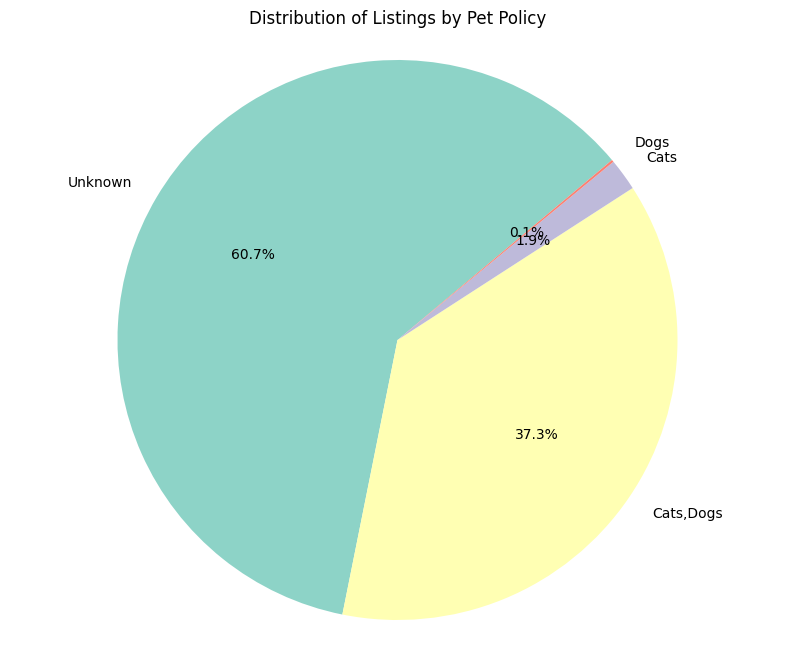

In [52]:
#Pie chart
pets_counts = data['pets_allowed'].value_counts()

# Creating the pie chart
plt.figure(figsize=(10, 8))
plt.pie(pets_counts, labels=pets_counts.index, autopct='%1.1f%%', startangle=40, colors=plt.cm.Set3.colors)
plt.title('Distribution of Listings by Pet Policy')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [53]:
# Replace missing 'amenities' values with 'Not Specified'
data['amenities'] = data['amenities'].fillna('Not Specified')

In [54]:
print(data['amenities'])

0                                            Not Specified
1                                            Not Specified
2                                            Not Specified
3                                            Not Specified
4                                            Not Specified
                               ...                        
99403    Gym,Parking,Patio/Deck,Playground,Storage,Wood...
99404    AC,Cable or Satellite,Clubhouse,Dishwasher,Gym...
99405                        Garbage Disposal,Refrigerator
99406                                             Gym,Pool
99407                            Gated,Parking,Wood Floors
Name: amenities, Length: 99408, dtype: object


In [55]:
# Convert 'price' column to numeric, setting non-numeric values to NaN
data['price'] = pd.to_numeric(data['price'], errors='coerce')

# Removing all the missing rows from 'price'
data = data.dropna(subset=['price'])
print(data['price'])

0        2195.0
1        1250.0
2        1395.0
3        1600.0
4         975.0
          ...  
99403     780.0
99404     813.0
99405    1325.0
99406     931.0
99407    1595.0
Name: price, Length: 99407, dtype: float64


In [56]:
# Drop rows with missing 'latitude', 'longitude' values
data['longitude'] = pd.to_numeric(data['longitude'], errors='coerce')
data['latitude'] = pd.to_numeric(data['latitude'], errors='coerce')
data = data.dropna(subset=['longitude', 'latitude'])
data = data[(data['longitude'].between(-180, 180)) & (data['latitude'].between(-90, 90))]

In [57]:
import re

# Replace missing 'cityname' values with 'Unknown'
data['cityname'] = data['cityname'].fillna('Unknown')

# Mark rows with special characters or numeric values as 'Unknown'
data['cityname'] = data['cityname'].apply(
    lambda x: "Unknown" if re.search(r'[^a-zA-Z\s]', str(x)) or str(x).isnumeric() else x)


In [58]:
import requests

url = "https://gist.githubusercontent.com/mshafrir/2646763/raw/8b0dbb93521f5d6889502305335104218454c2bf/states_hash.json"
response = requests.get(url)
states_json = response.json()

data['state_name'] = data['state'].map(states_json)
state_counts = data.groupby('state_name').size().reset_index(name='count')

geojson_url = 'https://raw.githubusercontent.com/PublicaMundi/MappingAPI/master/data/geojson/us-states.json'
us_states = requests.get(geojson_url).json()

data = data.dropna(subset=['state_name'])

data['state_name'] = data['state_name'].astype(str)

unique_states = sorted(data['state_name'].unique())

In [59]:
# From 'time' created a new column 'datetime'
data['datetime'] = pd.to_datetime(data['time'], unit='s')

In [60]:
print(data.head())

           id                category                            title  \
0  5668640009  housing/rent/apartment       One BR 507 & 509 Esplanade   
1  5668639818  housing/rent/apartment      Three BR 146 Lochview Drive   
2  5668639686  housing/rent/apartment  Three BR 3101 Morningside Drive   
3  5668639659  housing/rent/apartment            Two BR 209 Aegean Way   
4  5668639374  housing/rent/apartment         One BR 4805 Marquette NE   

                                                body      amenities  \
0  This unit is located at 507 & 509 Esplanade, R...  Not Specified   
1  This unit is located at 146 Lochview Drive, Ne...  Not Specified   
2  This unit is located at 3101 Morningside Drive...  Not Specified   
3  This unit is located at 209 Aegean Way, Vacavi...  Not Specified   
4  This unit is located at 4805 Marquette NE, Alb...  Not Specified   

   bathrooms  bedrooms currency fee  has_photo  ... price_type  square_feet  \
0        1.0       1.0      USD  No  Thumbnail  .

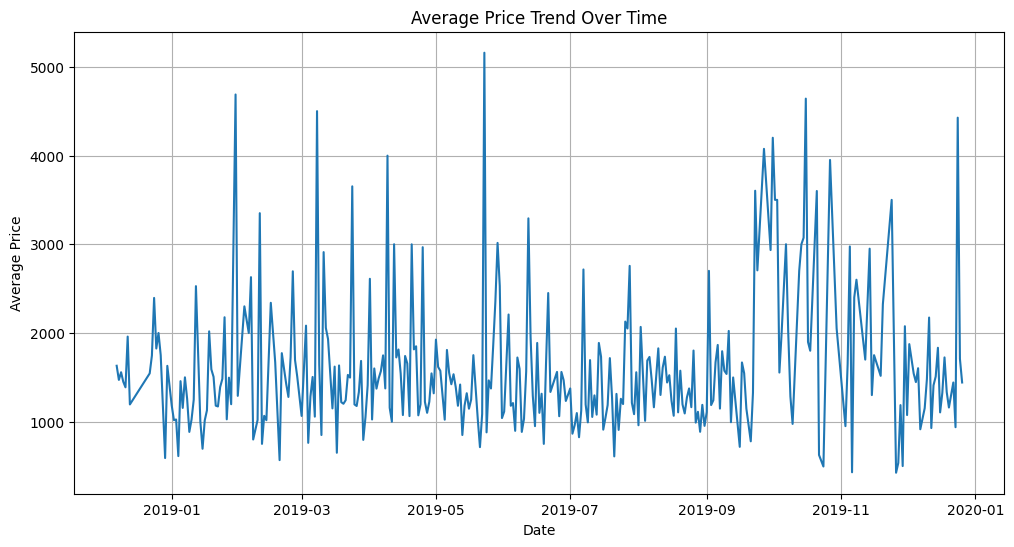

In [61]:
# Group data by 'datetime' and calculate the average price trend over time.
price_trends = data.groupby(data['datetime'].dt.date)['price'].mean().reset_index()
price_trends['datetime'] = pd.to_datetime(price_trends['datetime'])  # Ensure datetime format for plotting

plt.figure(figsize=(12, 6))
sns.lineplot(data=price_trends, x='datetime', y='price')
plt.title('Average Price Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.grid(True)
plt.show()

In [62]:
# Fill missing values in 'bedrooms' and 'bathrooms' with their respective medians
data['bedrooms'] = data['bedrooms'].fillna(data['bedrooms'].median())
data['bathrooms'] = data['bathrooms'].fillna(data['bathrooms'].median())

# Convert 'bedrooms' and 'bathrooms' columns to numeric, setting invalid strings to NaN
data['bedrooms'] = pd.to_numeric(data['bedrooms'], errors='coerce')
data['bathrooms'] = pd.to_numeric(data['bathrooms'], errors='coerce')

# Drop rows where either 'bedrooms' or 'bathrooms' is NaN due to string values
data = data.dropna(subset=['bedrooms', 'bathrooms']).reset_index(drop=True)

# Print the cleaned data
print(data[['bedrooms', 'bathrooms']])


       bedrooms  bathrooms
0           1.0        1.0
1           3.0        1.5
2           3.0        2.0
3           2.0        1.0
4           1.0        1.0
...         ...        ...
99100       1.0        1.0
99101       2.0        2.0
99102       1.0        1.0
99103       1.0        1.0
99104       2.0        1.5

[99105 rows x 2 columns]


In [63]:
print(data['bathrooms'].dtype)  # Should return 'float64' or 'int64'
print(data['bedrooms'].dtype)

float64
float64


C:\conda_temp\ipykernel_25916\1011146252.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[0], x=sorted_bedroom_counts.index, y=sorted_bedroom_counts, palette='coolwarm')
C:\conda_temp\ipykernel_25916\1011146252.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[1], x=sorted_bathroom_counts.index, y=sorted_bathroom_counts, palette='coolwarm')


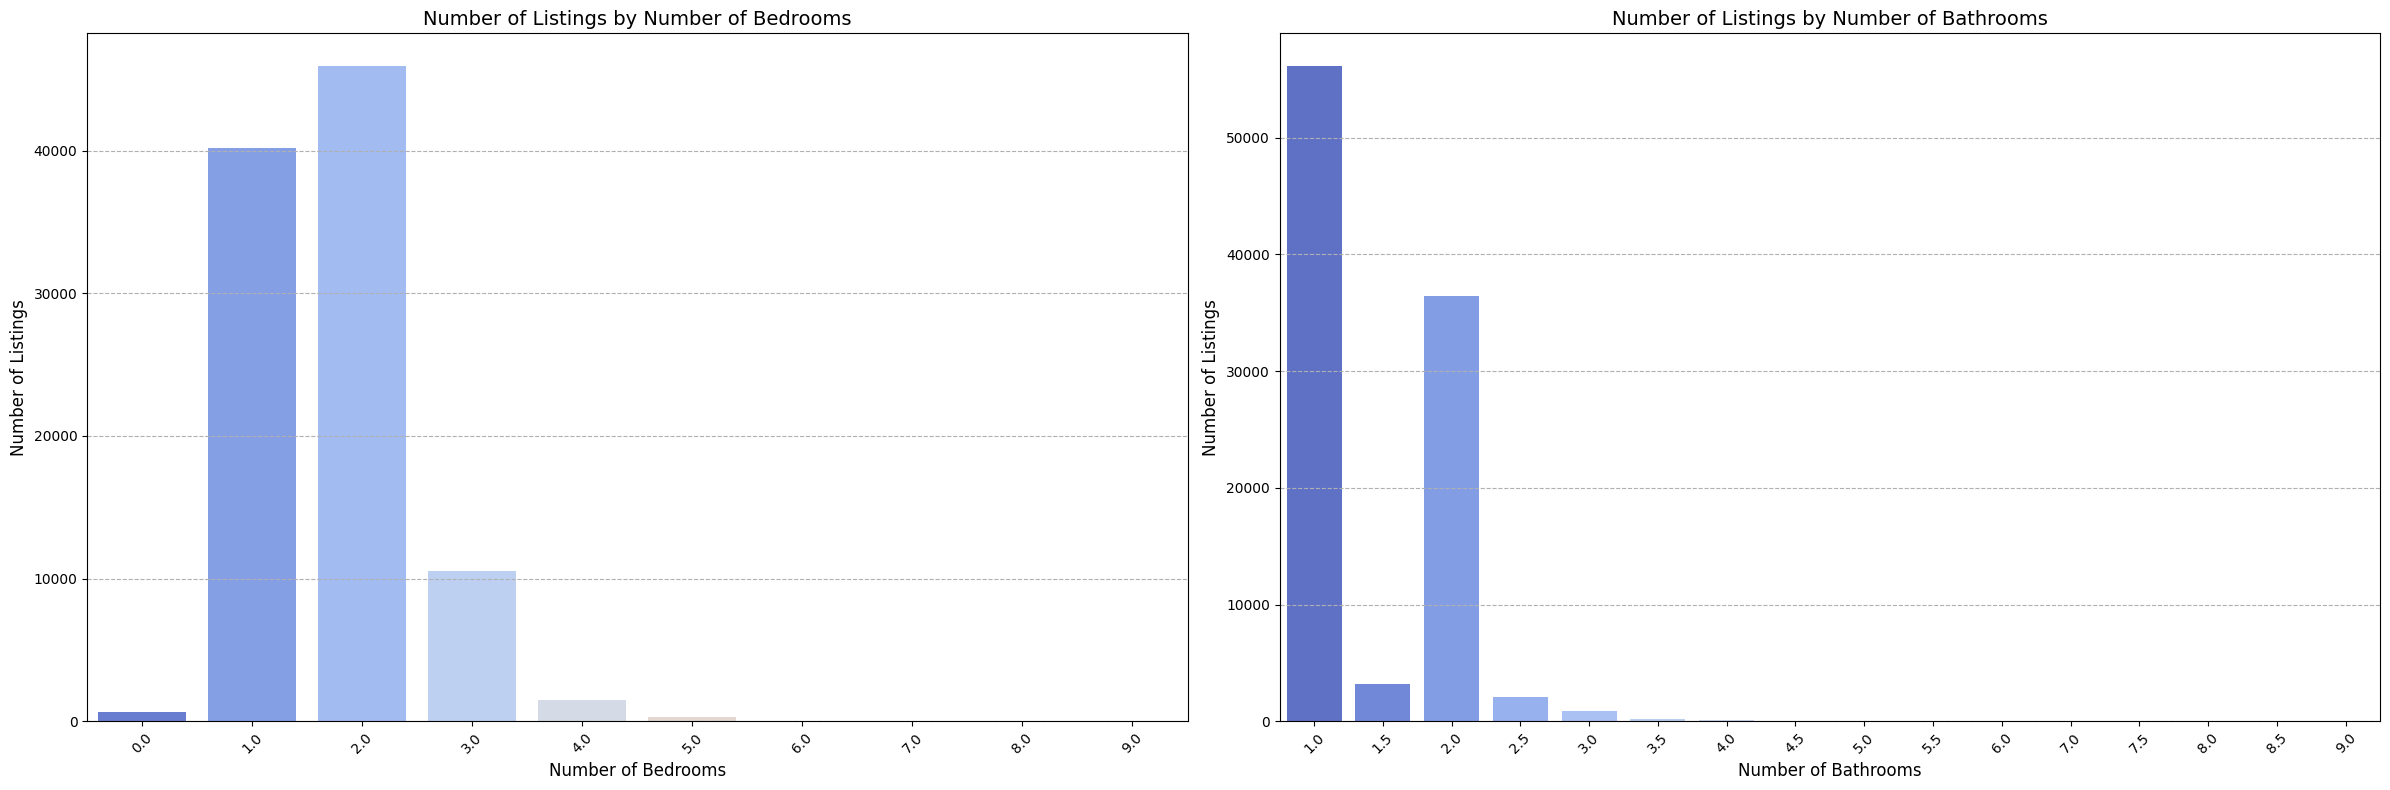

In [64]:
bedroom_counts = data['bedrooms'].value_counts()
bathroom_counts = data['bathrooms'].value_counts()

# Sorting the counts in descending order
sorted_bedroom_counts = bedroom_counts.sort_values(ascending=False)
sorted_bathroom_counts = bathroom_counts.sort_values(ascending=False)

# Creating a figure with two subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(24, 8))  # Adjust the figsize as needed

# Plotting number of bedrooms
sns.barplot(ax=axes[0], x=sorted_bedroom_counts.index, y=sorted_bedroom_counts, palette='coolwarm')
axes[0].set_title('Number of Listings by Number of Bedrooms', fontsize=14)
axes[0].set_xlabel('Number of Bedrooms', fontsize=12)
axes[0].set_ylabel('Number of Listings', fontsize=12)
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(axis='y', linestyle='--')

# Plotting number of bathrooms
sns.barplot(ax=axes[1], x=sorted_bathroom_counts.index, y=sorted_bathroom_counts, palette='coolwarm')
axes[1].set_title('Number of Listings by Number of Bathrooms', fontsize=14)
axes[1].set_xlabel('Number of Bathrooms', fontsize=12)
axes[1].set_ylabel('Number of Listings', fontsize=12)
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(axis='y', linestyle='--')

# Displaying the plots
plt.tight_layout()
plt.show()

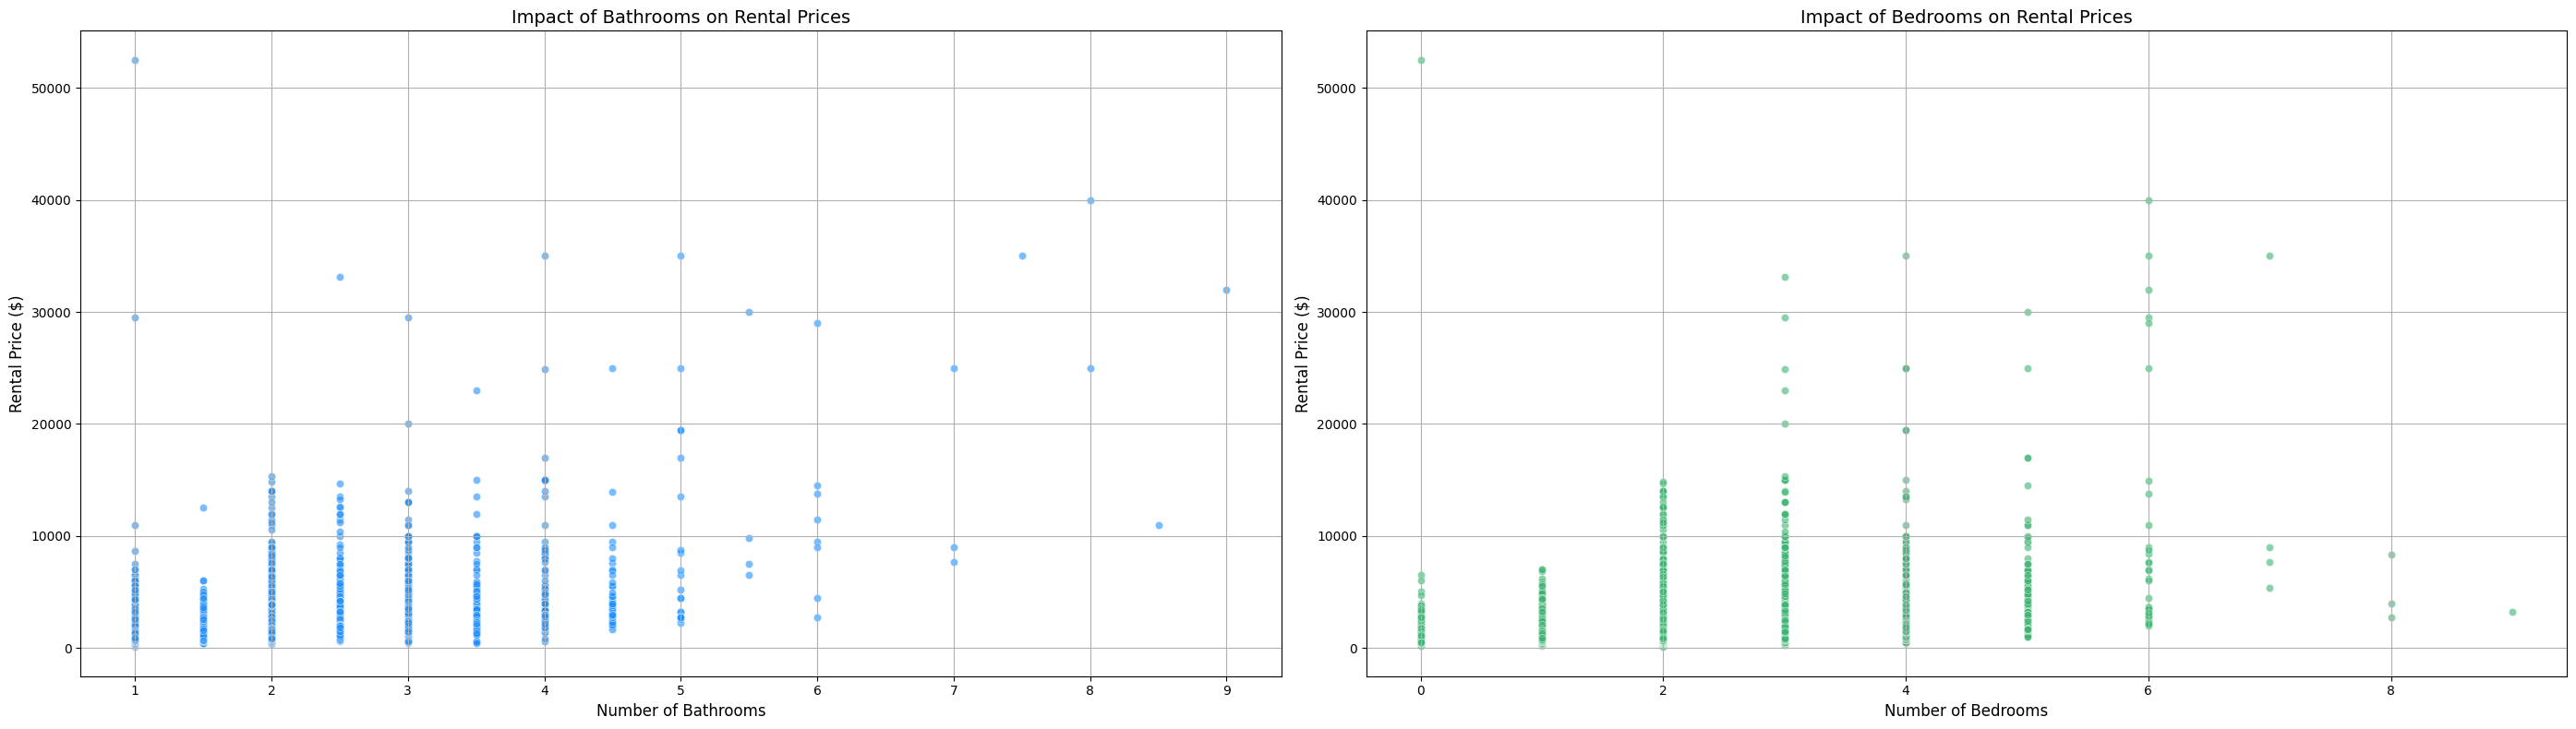

In [65]:
# Creating a figure with two subplots
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(28, 8))

# Scatter plot for bathrooms
sns.scatterplot(ax=ax[0], x='bathrooms', y='price', data=data, color='dodgerblue', alpha=0.6)
ax[0].set_title('Impact of Bathrooms on Rental Prices', fontsize=14)
ax[0].set_xlabel('Number of Bathrooms', fontsize=12)
ax[0].set_ylabel('Rental Price ($)', fontsize=12)
ax[0].grid(True)

# Scatter plot for bedrooms
sns.scatterplot(ax=ax[1], x='bedrooms', y='price', data=data, color='mediumseagreen', alpha=0.6)
ax[1].set_title('Impact of Bedrooms on Rental Prices', fontsize=14)
ax[1].set_xlabel('Number of Bedrooms', fontsize=12)
ax[1].set_ylabel('Rental Price ($)', fontsize=12)
ax[1].grid(True)

# Adjust layout for better fit and display the plots
plt.tight_layout()
plt.show()

In [66]:
# Convert 'square_feet' to numeric, replacing non-numeric values with NaN
data['square_feet'] = pd.to_numeric(data['square_feet'], errors='coerce')

# Drop rows where 'square_feet' is NaN (due to non-numeric values)
data = data.dropna(subset=['square_feet'])

# Reset index after dropping rows
data = data.reset_index(drop=True)

# Print the cleaned data
print(data['square_feet'])

0         542
1        1500
2        1650
3         820
4         624
         ... 
99100     605
99101     921
99102     650
99103     701
99104     900
Name: square_feet, Length: 99105, dtype: int64


In [67]:
print(data.shape)
data.describe()

(99105, 23)


,id,bathrooms,bedrooms,price,square_feet,latitude,longitude,time,datetime
count,9.910500e+04,99105.000000,99105.000000,99105.000000,99105.000000,99105.000000,99105.000000,9.910500e+04,99105
mean,5.358114e+09,1.445149,1.728682,1525.507694,955.996045,36.941309,-91.555552,1.559652e+09,2019-06-04 12:39:48.780596736
min,5.121046e+09,1.000000,0.000000,100.000000,101.000000,19.573800,-159.369800,1.544174e+09,2018-12-07 09:20:18
25%,5.197948e+09,1.000000,1.000000,1012.000000,729.000000,33.743600,-104.817100,1.550832e+09,2019-02-22 10:33:41
50%,5.508672e+09,1.000000,2.000000,1350.000000,900.000000,37.213900,-84.549400,1.568745e+09,2019-09-17 18:29:48
75%,5.509006e+09,2.000000,2.000000,1795.000000,1115.000000,39.955900,-77.576700,1.568767e+09,2019-09-18 00:35:46
max,5.669439e+09,9.000000,9.000000,52500.000000,40000.000000,64.833200,-68.778800,1.577391e+09,2019-12-26 20:17:05
std,1.846979e+08,0.547074,0.748731,903.660869,387.732138,4.604559,15.832541,1.105025e+07,NaN


In [68]:
# Save the cleaned DataFrame to an Excel file
excel_file_path = "cleanedApartments_data.xlsx"
data.to_excel(excel_file_path, index=False)

# Re-read the saved Excel file to confirm row counts match
saved_data_excel = pd.read_excel(excel_file_path)
print("Saved file shape (Excel):", saved_data_excel.shape)

# Check for any mismatch in rows
if data.shape[0] != saved_data_excel.shape[0]:
    print("Warning: Row counts do not match between DataFrame and saved Excel file.")
else:
    print("File saved successfully to Excel. Row counts match.")


Saved file shape (Excel): (99105, 23)
File saved successfully to Excel. Row counts match.
